In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML,display

warnings.filterwarnings("ignore")

for dirname, _, filenames in os.walk('/Users/nishanthsundaran/intelligent/AQI'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Load the dataset
df = pd.read_csv("/Users/nishanthsundaran/intelligent/AQI/city_day.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head(5)

/Users/nishanthsundaran/intelligent/AQI/station_day.csv
/Users/nishanthsundaran/intelligent/AQI/.DS_Store
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_CO.pkl
/Users/nishanthsundaran/intelligent/AQI/city_day.csv
/Users/nishanthsundaran/intelligent/AQI/stations.csv
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model.pkl
/Users/nishanthsundaran/intelligent/AQI/saved models/Nishanthsarima_model_CO.pkl
/Users/nishanthsundaran/intelligent/AQI/saved models/Nishanthsarima_model.pkl


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [2]:
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,26219,21930.000000,15453.000000,22986.000000,23002.000000,22176.000000,16372.000000,24258.000000,22675.000000,22559.000000,20932.000000,18664.000000,9412.000000,21937.000000
mean,2018-03-22 02:31:12.016476672,71.828907,125.492380,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,2017-02-21 00:00:00,31.450000,60.990000,5.930000,11.850000,13.110000,9.197500,0.530000,5.560000,19.010000,0.130000,0.670000,0.120000,85.000000
50%,2018-06-14 00:00:00,52.220000,100.950000,10.150000,21.830000,24.300000,17.820000,0.930000,9.120000,30.890000,0.980000,2.850000,0.820000,124.000000
75%,2019-06-26 00:00:00,85.655000,158.460000,20.830000,37.890000,42.102500,32.600000,1.530000,15.595000,45.370000,2.850000,8.830000,3.232500,226.000000
max,2020-05-01 00:00:00,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000
std,NaN,67.161387,94.179918,23.081236,25.158322,32.695931,27.109244,7.385259,19.087561,21.388968,16.699933,21.137700,6.644018,146.143064


In [3]:
df=df[['City','Date','AQI','AQI_Bucket','PM2.5', 'PM10', 'NO','SO2','NO2']]

In [4]:
cities=pd.unique(df['City'])
column1= cities+'NO2'
column2=cities+'_AQI_'
columns=[*column1,*column2]

In [5]:
final_df=pd.DataFrame(index=np.arange('2015-01-01','2020-05-02',dtype='datetime64[D]'),columns=column1)
for city,i in zip(cities,final_df.columns):
    n=len(np.array(df[df['City']==city]['NO2']))
    final_df[i][-n:]=np.array(df[df['City']==city]['NO2'])

In [6]:
final_df=final_df.astype('float64')
final_df=final_df.resample(rule='MS').mean()

In [7]:
final_df.tail()

,AhmedabadNO2,AizawlNO2,AmaravatiNO2,AmritsarNO2,BengaluruNO2,BhopalNO2,BrajrajnagarNO2,ChandigarhNO2,ChennaiNO2,DelhiNO2,...,JaipurNO2,JorapokharNO2,KochiNO2,KolkataNO2,LucknowNO2,MumbaiNO2,PatnaNO2,ShillongNO2,TalcherNO2,ThiruvananthapuramNO2
2020-01-01,19.589677,NaN,14.069677,10.137419,34.301290,42.714839,18.316552,13.248710,15.766452,47.604839,...,43.505806,8.259032,60.823000,55.295484,67.116774,38.964839,34.861290,2.462903,14.359032,23.444516
2020-02-01,62.714828,NaN,13.789310,15.915926,32.095862,41.475517,20.685000,17.230345,13.747586,48.892759,...,49.343793,9.770714,22.600690,60.075862,44.884483,47.781379,51.449655,2.955556,4.986897,22.523103
2020-03-01,33.917419,0.820476,7.018710,11.571290,21.364194,23.203929,10.932353,13.363548,9.533548,33.779355,...,29.194839,10.687742,4.173200,29.444839,23.719032,23.563226,51.606452,2.635806,5.102857,14.766129
2020-04-01,23.090667,0.290000,4.798000,14.592000,11.981000,11.122917,NaN,11.613333,8.774667,21.008333,...,13.514333,11.213793,4.302667,10.049667,16.219000,7.757000,26.362667,2.560000,8.066667,7.879667
2020-05-01,14.020000,0.030000,5.600000,14.310000,13.000000,23.380000,NaN,16.820000,5.880000,26.980000,...,27.540000,10.570000,4.580000,8.110000,17.050000,5.220000,11.840000,1.440000,19.490000,7.840000


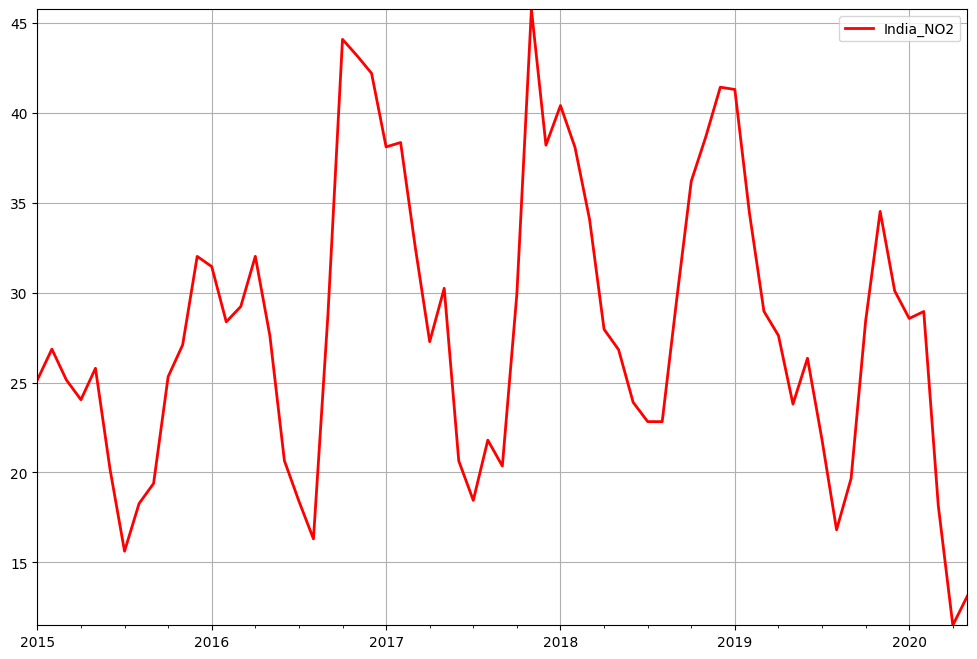

In [8]:
final_df['India_NO2']=final_df.mean(axis=1)
ax=final_df[['India_NO2']].plot(figsize=(12,8),grid=True,lw=2,color='Red')
ax.autoscale(enable=True, axis='both', tight=True)

In [9]:
df_2019=final_df['2019-01-01':'2020-01-01']
df_2019.head()

,AhmedabadNO2,AizawlNO2,AmaravatiNO2,AmritsarNO2,BengaluruNO2,BhopalNO2,BrajrajnagarNO2,ChandigarhNO2,ChennaiNO2,DelhiNO2,...,JorapokharNO2,KochiNO2,KolkataNO2,LucknowNO2,MumbaiNO2,PatnaNO2,ShillongNO2,TalcherNO2,ThiruvananthapuramNO2,India_NO2
2019-01-01,82.761290,NaN,74.472903,25.485484,40.262258,NaN,25.946129,NaN,12.720323,60.671290,...,10.046452,NaN,105.740645,45.971613,51.283448,41.146774,NaN,4.032500,9.637742,41.311261
2019-02-01,72.191786,NaN,31.631071,16.236071,35.756786,NaN,23.492857,NaN,11.700000,47.770357,...,9.959643,NaN,96.078571,42.009643,28.940800,44.197143,NaN,3.790000,7.821429,34.462214
2019-03-01,74.672581,NaN,11.868710,15.266129,33.675806,NaN,20.140968,NaN,19.563548,45.960323,...,9.697586,NaN,67.846129,42.541935,15.475484,52.192581,NaN,7.381765,5.814194,28.972975
2019-04-01,70.703214,NaN,11.794333,27.166000,33.029000,NaN,21.788889,NaN,12.792333,48.454000,...,9.378000,NaN,31.136000,40.796333,22.573667,47.674333,NaN,15.622500,5.488333,27.621385
2019-05-01,80.013704,NaN,21.334839,26.439355,27.073871,NaN,18.733684,NaN,17.339677,51.666452,...,7.573667,NaN,15.856129,25.245484,13.647097,9.888387,NaN,12.032333,4.995484,23.806192


In [10]:
df_2019.isna().sum()

AhmedabadNO2              0
AizawlNO2                13
AmaravatiNO2              1
AmritsarNO2               0
BengaluruNO2              0
BhopalNO2                 8
BrajrajnagarNO2           0
ChandigarhNO2             8
ChennaiNO2                0
DelhiNO2                  0
ErnakulamNO2             12
GurugramNO2               0
GuwahatiNO2               1
HyderabadNO2              0
JaipurNO2                 0
JorapokharNO2             0
KochiNO2                 12
KolkataNO2                0
LucknowNO2                0
MumbaiNO2                 0
PatnaNO2                  0
ShillongNO2               7
TalcherNO2                0
ThiruvananthapuramNO2     0
India_NO2                 0
dtype: int64

In [11]:
df_2019=df_2019.drop(['AizawlNO2','ErnakulamNO2','KochiNO2',],axis=1)

In [15]:
NO2_2019 = df_2019.mean(axis=0)

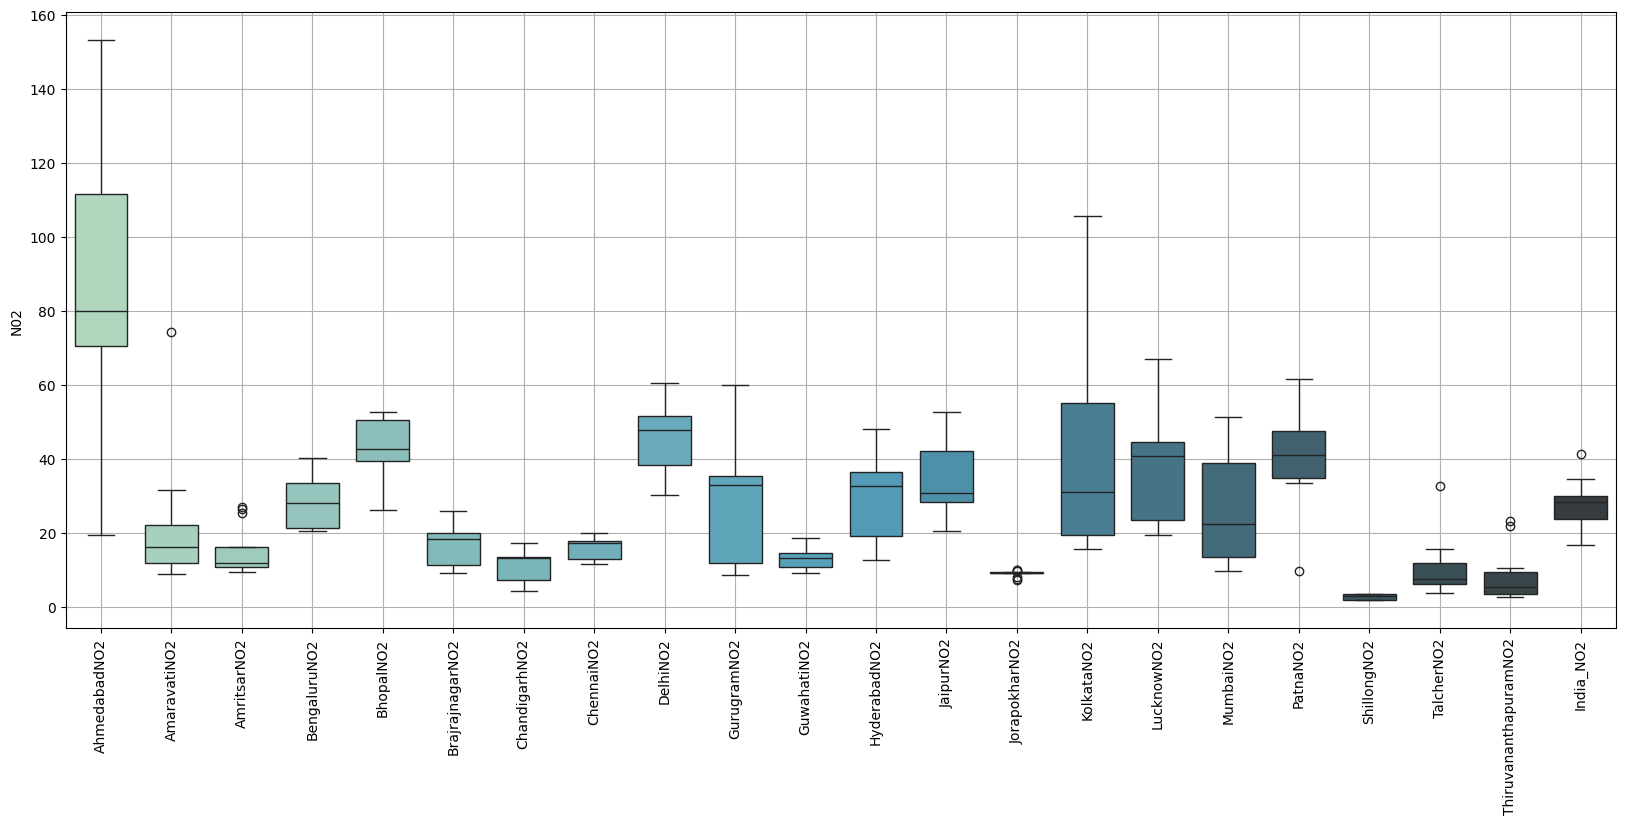

In [16]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
bplot = sns.boxplot( data=df_2019,  width=0.75,palette="GnBu_d")
plt.ylabel('N02');
bplot.grid(True)

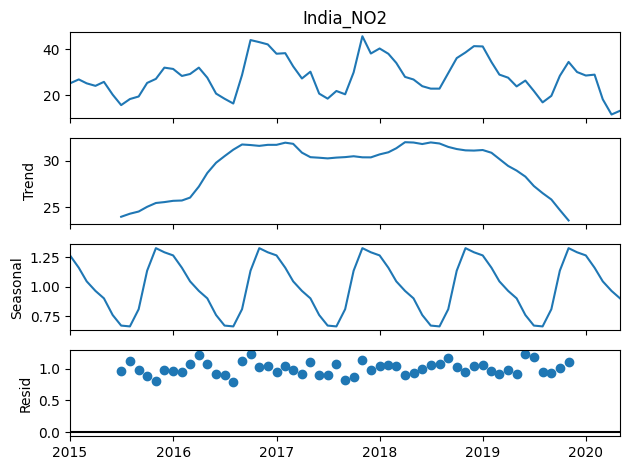

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
India_NO2=final_df['India_NO2']
result=seasonal_decompose(India_NO2,model='multiplicative')
result.plot();

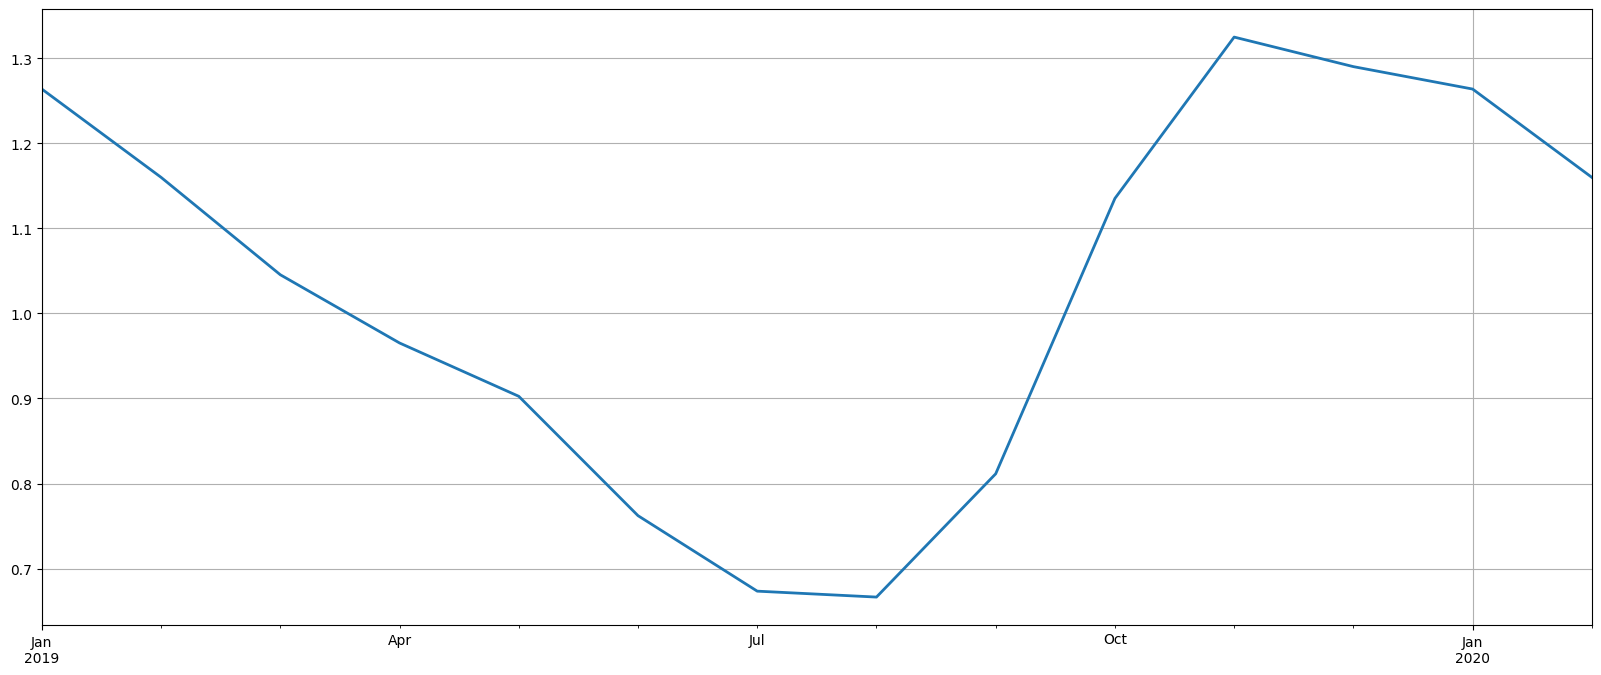

In [19]:
from matplotlib import dates
ax=result.seasonal.plot(xlim=['2019-01-01','2020-02-10'],figsize=(20,8),lw=2)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [20]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima;  

In [21]:
auto_arima(y=India_NO2,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   65
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 12)   Log Likelihood                -190.211
Date:                            Thu, 04 Jan 2024   AIC                            390.422
Time:                                    12:44:52   BIC                            401.294
Sample:                                01-01-2015   HQIC                           394.711
                                     - 05-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3998      1.421      1.689      0.091      -0.385       5.185
ar.L1          0.7603      0.107      7.091      0.000       0.550       0.970
ar.S.L12       0.2527      0.177      1.428      0.153      -0.094       0.600
ar.S.L24       0.3606      0.189      1.904      0.057      -0.011       0.732
sigma2        18.5125      3.170      5.840      0.000      12.299      24.726
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                24.30
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                             0.99
Prob(H) (two-sided):                  0.49   Kurtosis:                         5.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
#dividing into train and test:
train=India_NO2[:41]
test=India_NO2[42:54]

In [24]:
# Forming the model:
model=SARIMAX(train,order=(3,1,3),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24845D+00    |proj g|=  2.48261D-01

At iterate    5    f=  3.03134D+00    |proj g|=  1.15277D-01

At iterate   10    f=  2.99470D+00    |proj g|=  5.05791D-02

At iterate   15    f=  2.97717D+00    |proj g|=  9.82316D-03

At iterate   20    f=  2.97462D+00    |proj g|=  7.37026D-03

At iterate   25    f=  2.97378D+00    |proj g|=  2.52506D-03

At iterate   30    f=  2.97119D+00    |proj g|=  1.54960D-02

At iterate   35    f=  2.97106D+00    |proj g|=  9.18732D-04

At iterate   40    f=  2.97106D+00    |proj g|=  3.36319D-03

At iterate   45    f=  2.97096D+00    |proj g|=  6.20476D-03

At iterate   50    f=  2.97087D+00    |proj g|=  1.22199D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/nishanthsundaran/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            India_NO2   No. Observations:                   41
Model:             SARIMAX(3, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -121.806
Date:                              Thu, 04 Jan 2024   AIC                            261.612
Time:                                      12:45:16   BIC                            276.812
Sample:                                  01-01-2015   HQIC                           267.108
                                       - 05-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3969     44.344     -0.009      0.993     -87.310      86.517
ar.L2          0.4184     61.850      0.007      0.995    -120.805     121.642
ar.L3          0.9770     43.365      0.023      0.982     -84.017      85.971
ma.L1          0.4778   1206.677      0.000      1.000   -2364.566    2365.522
ma.L2         -0.4877   1783.948     -0.000      1.000   -3496.962    3495.986
ma.L3         -0.9901   1196.258     -0.001      0.999   -2345.612    2343.632
ar.S.L12       0.6049      1.023      0.592      0.554      -1.399       2.609
ma.S.L12      -0.1770      1.236     -0.143      0.886      -2.600       2.246
sigma2        22.2069   2.58e+04      0.001      0.999   -5.06e+04    5.07e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 8.02
Prob(Q):                              0.89   Prob(JB):                         0.02
Heteroskedasticity (H):               3.40   Skew:                             0.97
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
#Obtaining predicted values:
predictions = results.predict(start=42, end=53, typ='levels').rename('Predictions')

<Axes: >

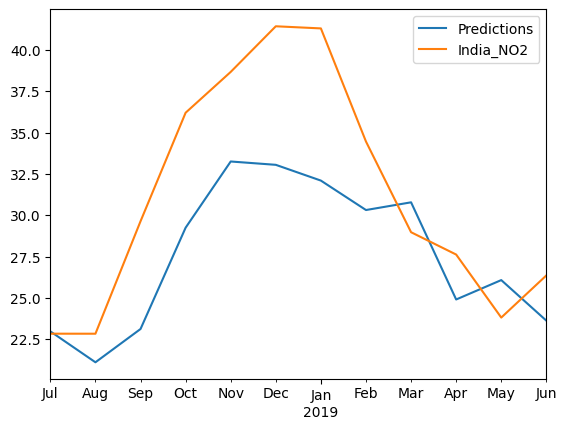

In [26]:
#Plotting predicted values against the true values:
predictions.plot(legend=True)
test.plot(legend=True)

In [27]:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(predictions,test))
print('RMSE = ',RMSE)
print('Mean PM10',test.mean())

RMSE =  5.156821423675317
Mean PM10 31.179480316037115


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.27490D+00    |proj g|=  5.88182D-01

At iterate    5    f=  2.98801D+00    |proj g|=  4.82687D-02

At iterate   10    f=  2.91160D+00    |proj g|=  2.76474D-02

At iterate   15    f=  2.89154D+00    |proj g|=  1.68738D-02

At iterate   20    f=  2.87070D+00    |proj g|=  1.96808D-02

At iterate   25    f=  2.86407D+00    |proj g|=  8.40467D-04

At iterate   30    f=  2.86403D+00    |proj g|=  3.95934D-03

At iterate   35    f=  2.86364D+00    |proj g|=  4.23538D-03

At iterate   40    f=  2.86352D+00    |proj g|=  8.03282D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

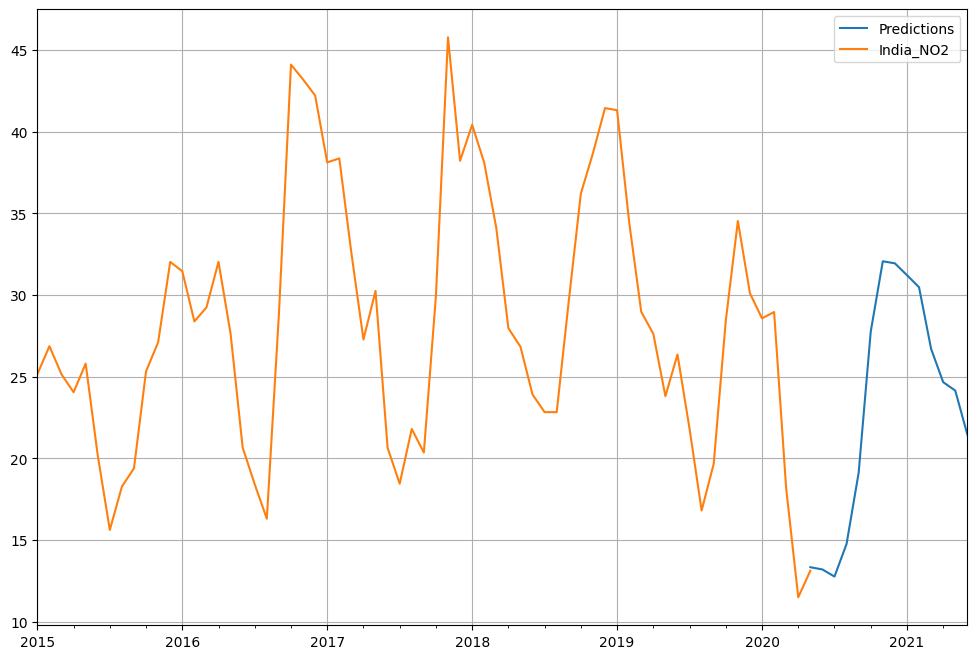

In [28]:
# Forming the model:
model=SARIMAX(India_NO2,order=(2,1,3),seasonal_order=(1,0,1,12))
results=model.fit()
results.summary()
#Obtaining predicted values:
predictions = results.predict(start=64, end=77, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
India_NO2.plot(legend=True,figsize=(12,8),grid=True);

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.23489D+00    |proj g|=  3.87759D-01

At iterate    5    f=  2.97987D+00    |proj g|=  4.35613D-02

At iterate   10    f=  2.95163D+00    |proj g|=  8.39819D-03

At iterate   15    f=  2.94817D+00    |proj g|=  1.24767D-02

At iterate   20    f=  2.94705D+00    |proj g|=  6.99417D-03

At iterate   25    f=  2.94661D+00    |proj g|=  7.23098D-04

At iterate   30    f=  2.94659D+00    |proj g|=  9.63766D-05

At iterate   35    f=  2.94659D+00    |proj g|=  4.23594D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


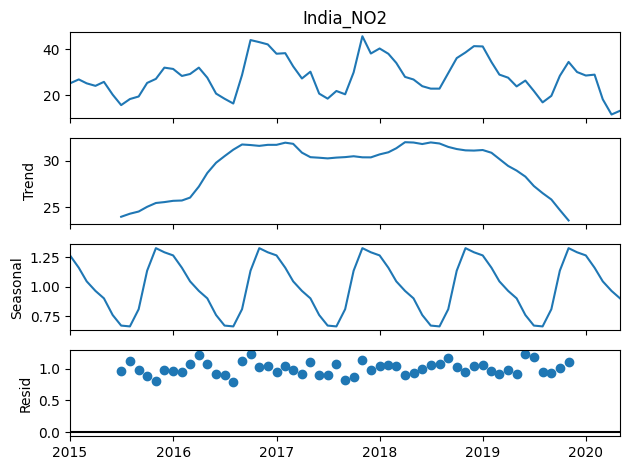

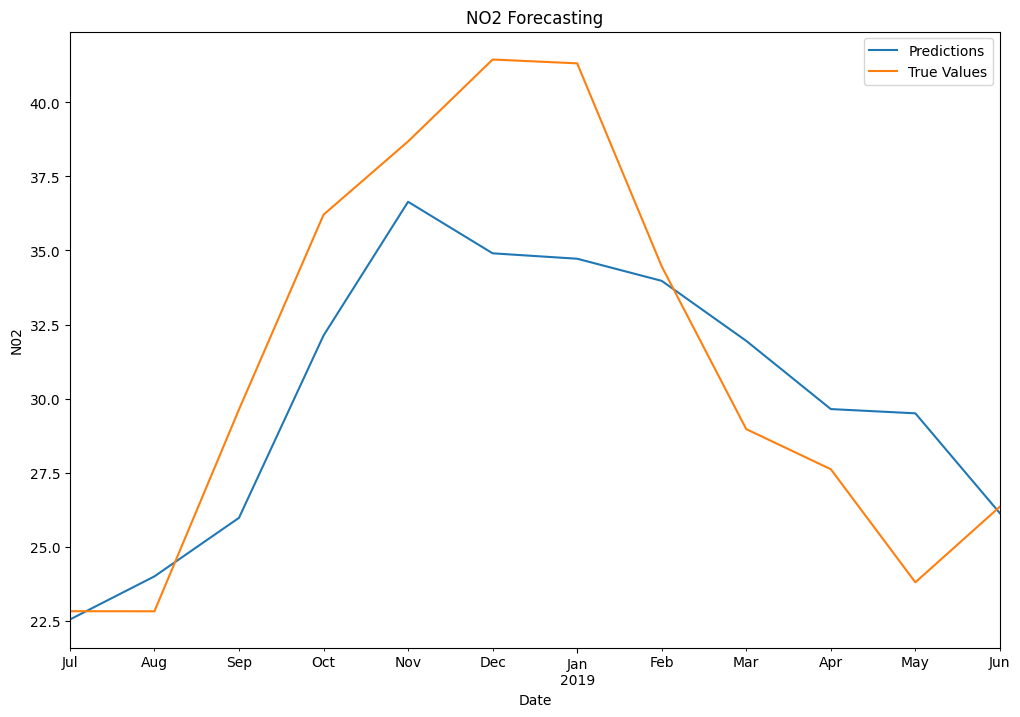

RMSE: 3.7363046451790014
Mean NO2 (test data): 31.179480316037115
Forecasted NO2 for 2020-06-01: 27.228869470894615


In [29]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from IPython.display import HTML, display
import warnings

# Ignore harmless warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("/Users/nishanthsundaran/intelligent/AQI/city_day.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df[['City', 'Date', 'AQI', 'AQI_Bucket', 'PM2.5', 'PM10', 'NO', 'SO2', 'NO2', 'CO']]
cities = pd.unique(df['City'])
column1 = cities + 'NO2'
column2 = cities + '_AQI_'
columns = [*column1, *column2]
final_df = pd.DataFrame(index=np.arange('2015-01-01', '2020-05-02', dtype='datetime64[D]'), columns=column1)

for city, i in zip(cities, final_df.columns):
    n = len(np.array(df[df['City'] == city]['NO2']))
    final_df[i][-n:] = np.array(df[df['City'] == city]['NO2'])

final_df = final_df.astype('float64')
final_df = final_df.resample(rule='MS').mean()

final_df['India_NO2'] = final_df.mean(axis=1)

# Plot seasonal decomposition
India_CO = final_df['India_NO2']
result = seasonal_decompose(India_NO2, model='multiplicative')
result.plot();

# Load specific forecasting tools
auto_arima_result = auto_arima(y=India_NO2, start_p=0, start_P=0, start_q=0, start_Q=0, seasonal=True, m=12)

# Divide into train and test
train = India_CO[:41]
test = India_CO[42:54]

# Forming the model
model = SARIMAX(train, order=(2, 1, 3), seasonal_order=(1, 0, 1, 12))
results = model.fit()

# Obtain predicted values for the specific date
specific_date = '2020-06-01'
forecast = results.get_prediction(start=pd.to_datetime(specific_date), end=pd.to_datetime(specific_date), dynamic=False)
predicted_NO2_specific_date = forecast.predicted_mean.values[0]

# Plotting
predictions = results.predict(start=42, end=53, typ='levels').rename('Predictions')
plt.figure(figsize=(12, 8))
predictions.plot(legend=True, label='Predictions')
test.plot(legend=True, label='True Values')
plt.title('NO2 Forecasting')
plt.xlabel('Date')
plt.ylabel('N02')
plt.show()

# Evaluate the performance
RMSE = np.sqrt(mean_squared_error(predictions, test))
print('RMSE:', RMSE)
print('Mean NO2 (test data):', test.mean())
print(f'Forecasted NO2 for {specific_date}: {predicted_CO_specific_date}')


In [31]:
predictions

2018-07-01    22.551230
2018-08-01    24.007218
2018-09-01    25.981582
2018-10-01    32.130093
2018-11-01    36.641891
2018-12-01    34.903458
2019-01-01    34.720788
2019-02-01    33.974506
2019-03-01    31.950132
2019-04-01    29.649560
2019-05-01    29.506672
2019-06-01    26.136167
Freq: MS, Name: Predictions, dtype: float64

In [32]:
import pickle


# Save the trained model using pickle
with open('/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_NO2.pkl', 'wb') as file:
    pickle.dump(results, file)

In [36]:
import pickle
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the saved SARIMAX model
with open('/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_NO2.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Extend the time index to include the forecast period
extended_index = pd.date_range(start='2015-01-01', end='2025-12-31', freq='MS')

# Specify the specific date for forecasting
specific_date = '2020-06-01'

# Check if the specific date is within the range of the extended index
if pd.to_datetime(specific_date) not in extended_index:
    raise ValueError(f"'specific_date' should be within the range of the extended index.")

# Make predictions using the loaded model for the specific date
forecast = loaded_model.get_prediction(start=extended_index.get_loc(specific_date), end=extended_index.get_loc(specific_date), dynamic=False)
predicted_value = forecast.predicted_mean[0]

# Display the forecasted CO value for the specified date
print(f"The forecasted NO2 value for {specific_date} is: {predicted_value}")


The forecasted NO2 value for 2020-06-01 is: 27.228869470894615
